In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ecom_df = pd.read_csv("ecommerce-data.csv")
ecom_df.head()

,Unnamed: 0,dateTime,country,city,region,screenRed,surveyType,purposeProductInfo,purposeBuyFromSite,purposeComparePricing,...,behavPageviews,behavHomePage,behavDetailProdA,behavDetailProdB,behavDetailProdC,behavAnySolution,behavAnySale,behavCart,behavConversion,pageViewInt
0,1,7/25/2014 14:10,United States,Monroe,LA,1280x1024,At Exit,Products,NaN,NaN,...,4 to 6,1,1,0,0,0,0,0,0,5
1,2,7/25/2014 15:01,United States,Ambler,PA,1280x800,At Exit,NaN,Buy from this site,Compare pricing,...,1,0,0,0,0,0,0,0,0,1
2,3,7/25/2014 15:15,United States,Beaumont,TX,768x1024,At Exit,NaN,NaN,Compare pricing,...,10+,0,0,0,0,1,1,0,0,11
3,4,7/25/2014 17:05,United States,Cedar City,UT,1280x960,At Exit,Products,NaN,NaN,...,10+,0,1,1,0,1,0,0,0,11
4,5,7/26/2014 0:27,United States,Bullhead City,AZ,1138x640,At Exit,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1


In [6]:
# Aggregate the 'pageViewInt' column by 'profile' and calculate the sum
result = ecom_df.groupby('profile')['pageViewInt'].sum().reset_index()

print(result)

                     profile  pageViewInt
0                          0            2
1       Friend/family friend          146
2        Health Professional         1617
3                      Other          662
4                     Parent         5436
5  Person with [condition A]          336
6                   Relative          688
7                    Teacher         1364


In [14]:
# create a 0 serie
new_column = pd.Series(np.zeros(8,),name="count")
dummy = pd.concat([pd.Series(pd.unique(ecom_df["profile"]).transpose(),name="profile"),new_column],axis=1)

In [ ]:
dummy

In [19]:
for row in range(ecom_df.shape[0]):
    for profile in range(len(dummy["profile"])):
        if ecom_df["profile"][row] == dummy["profile"][profile]:
            dummy.loc[profile, "count"] += ecom_df["pageViewInt"][row]
            break
dummy

,profile,count
0,Parent,5436.0
1,Person with [condition A],336.0
2,Teacher,1364.0
3,Health Professional,1617.0
4,Other,662.0
5,Relative,688.0
6,Friend/family friend,146.0
7,0,2.0


In [20]:
female_male = ecom_df[(ecom_df['gender'] == 'Female') | (ecom_df['gender'] == 'Male')]
profile_gender_table = pd.crosstab(female_male['profile'], female_male['gender'], normalize='index')

print(profile_gender_table)

gender                       Female      Male
profile                                      
Friend/family friend       1.000000  0.000000
Health Professional        0.976744  0.023256
Other                      0.953488  0.046512
Parent                     0.914286  0.085714
Person with [condition A]  0.928571  0.071429
Relative                   0.923077  0.076923
Teacher                    0.962500  0.037500


In [23]:
pp_table = pd.crosstab(ecom_df["profile"], ecom_df["purchasedWhen"])
pp_table

purchasedWhen,In the past month,In the past week,In the past year,More than a year ago
profile,,,,
Health Professional,11,0,78,10
Other,6,0,13,2
Parent,21,4,123,26
Person with [condition A],0,0,1,0
Relative,2,0,14,1
Teacher,3,1,23,8


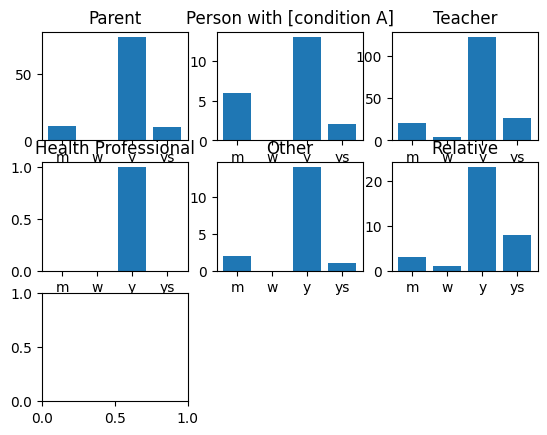

In [59]:
# plt.xlim([1,2,3,4])
for i,purchase_type in enumerate(pd.unique(ecom_df["profile"])):
    
    plt.subplot(3,3,i+1)
    try:
        plt.bar(["m","w","y","ys"],pp_table.iloc[i,:])
    except (ValueError, IndexError):
        break
    plt.title(purchase_type)


In [63]:
    cross_tab = pd.crosstab(index=[ecom_df['gender'], ecom_df['profile']], columns=ecom_df['behavAnySale'], normalize='columns')

print(cross_tab)

behavAnySale                                           0         1
gender               profile                                      
Female               Friend/family friend       0.007477  0.013514
                     Health Professional        0.209346  0.189189
                     Other                      0.072897  0.027027
                     Parent                     0.420561  0.418919
                     Person with [condition A]  0.024299  0.000000
                     Relative                   0.061682  0.040541
                     Teacher                    0.119626  0.175676
Male                 Health Professional        0.005607  0.000000
                     Other                      0.003738  0.000000
                     Parent                     0.035514  0.067568
                     Person with [condition A]  0.001869  0.000000
                     Relative                   0.005607  0.000000
                     Teacher                    0.001869  0.02